In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np


Bad key "ytick.alignment" on line 268 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "xtick.alignment" on line 250 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def aggregate(before_aggregate, aggregate_feature):
    if aggregate_feature == 'day':
        after_aggregate = []
        pos_date = -1
        before_aggregate.sort(key = itemgetter(9))#sort by timestamp
        temp = groupby(before_aggregate, itemgetter(-2))
        group_unit = []
        mean = []
        for i, item in temp:# i is group id
            for jtem in item:# unit in each group
                group_unit.append(jtem)
            #for feature_i in xrange(6):
            #    mean.append(zip(group_unit)[feature_i])
            #after_aggregate.append(group_unit)
            after_aggregate.append(mean)
            group_unit = []
        #print after_aggregate[0]
        #print before_aggregate[0]
    if aggregate_feature == 'client':
        after_aggregate = []
        pos_client = -3
        before_aggregate.sort(key = itemgetter(pos_client))#sort with cardID firstly，if sort with 2 feature, itemgetter(num1,num2)
        temp = groupby(before_aggregate, itemgetter(pos_client))#group
        group_unit = []
        for i, item in temp:# i is group id
            for jtem in item:# unit in each group
                group_unit.append(jtem)
            after_aggregate.append(group_unit)
            group_unit = []
    return after_aggregate

In [3]:
def aggregate_mean(before_aggregate):
    #print before_aggregate[0]
    if True:
        after_aggregate = []
        pos_date = -1
        before_aggregate.sort(key = itemgetter(-1))#sort by timestamp
        temp = groupby(before_aggregate, itemgetter(-1))
        group_unit = []
        mean = []
        for i, item in temp:# i is group id
            for jtem in item:# unit in each group
                group_unit.append(list(jtem))
            #print group_unit
            if len(zip(group_unit)) < 2:
                after_aggregate.append(group_unit)
                group_unit = []
            if len(zip(group_unit)) >= 2:
                #print zip(group_unit)
                for feature_i in xrange(14):
                    #print zip(group_unit)[feature_i]
                    mean.append(sum(zip(*group_unit)[feature_i])/len(zip(group_unit)))
                after_aggregate.append(mean)
                group_unit = []
                mean = []
        #print after_aggregate[0]
        #print before_aggregate[0]
    return after_aggregate

In [4]:
def plot_benign_fraud(df, feature_x, feature_y):
    x_benign = []
    x_fraud = []
    y_benign = []
    y_fraud = []
    df_benign = df[df['label'] == 0]
    df_fraud = df[df['label'] == 1]
    x_benign = np.array(df_benign[feature_x])
    x_fraud = np.array(df_fraud[feature_x])
    y_benign = np.array(df_benign[feature_y])
    y_fraud = np.array(df_fraud[feature_y])
    
    plt.plot(x_benign, y_benign, 'b.')
    plt.plot(x_fraud, y_fraud, 'r.')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y) 
    plt.show()
            
    
def plot_good_bad(feature_x,feature_y):
    x_good = []
    y_good = []
    x_fraud = []
    y_fraud = []
    for e in data:
        if e[-2] == 0:
            x_good.append(e[feature_x])
            y_good.append(e[feature_y])
        else:
            x_fraud.append(e[feature_x])
            y_fraud.append(e[feature_y])

    plt.plot(x_good, y_good, 'b.')
    plt.plot(x_fraud,y_fraud, 'r.')

In [5]:
df = pickle.load(open('dataframe.pickle', 'rb'))
print(df.dtypes)
df.head()

issuercountrycode                object
txvariantcode                    object
bin                             float64
amount                          float64
currencycode                     object
shoppercountrycode               object
shopperinteraction               object
cardverificationcodesupplied     object
cvcresponsecode                   int64
creationdate                     object
accountcode                      object
mail_id                           int64
ip_id                             int64
card_id                           int64
label                             int64
creationdate_timestamp          float64
dtype: object


,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,creationdate,accountcode,mail_id,ip_id,card_id,label,creationdate_timestamp
196377,GB,visagold,494120.0,5227.0,GBP,GB,ContAuth,False,0,2015-10-1,UKAccount,273151,250291,216279,0,1.443726e+09
195925,GB,visadebit,492181.0,6895.0,GBP,GB,Ecommerce,NaN,1,2015-10-1,UKAccount,194157,13886,19361,0,1.443708e+09
195926,GB,visadebit,465858.0,8695.0,GBP,GB,Ecommerce,NaN,1,2015-10-1,UKAccount,230463,52387,106890,0,1.443708e+09
195927,GB,visadebit,476367.0,21700.0,GBP,GB,Ecommerce,True,1,2015-10-1,UKAccount,145581,43039,177365,0,1.443708e+09
195928,HK,visaplatinum,455728.0,9995.0,GBP,HK,Ecommerce,True,1,2015-10-1,UKAccount,90133,25944,175345,0,1.443708e+09


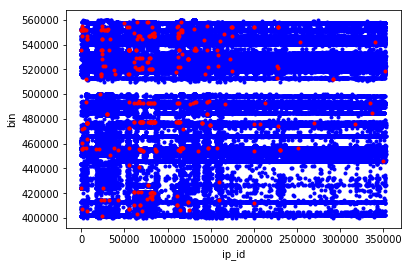

In [6]:
# day_aggregate = aggregate(data,'day')
# client_aggregate = aggregate(data,'client')
# transaction_num_day = []
# for item in day_aggregate:
#     transaction_num_day.append(len(item))
# transaction_num_day

plot_benign_fraud(df,'ip_id','bin')

In [7]:
# x = []#contains features
# y = []#contains labels
# data = []
# color = []